AIR QUALITY PREDICTION

* *PROJECT 4*

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
df=pd.read_csv('station_hour.csv')

C:\Users\arrma\AppData\Local\Temp\ipykernel_22332\3103919852.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('station_hour.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2589083 entries, 0 to 2589082
Data columns (total 16 columns):
 #   Column      Dtype  
---  ------      -----  
 0   StationId   object 
 1   Datetime    object 
 2   PM2.5       float64
 3   PM10        float64
 4   NO          float64
 5   NO2         float64
 6   NOx         float64
 7   NH3         float64
 8   CO          float64
 9   SO2         float64
 10  O3          float64
 11  Benzene     float64
 12  Toluene     float64
 13  Xylene      float64
 14  AQI         float64
 15  AQI_Bucket  object 
dtypes: float64(13), object(3)
memory usage: 316.1+ MB


In [4]:
df.isnull().sum()

StationId           0
Datetime            0
PM2.5          647689
PM10          1119252
NO             553711
NO2            528973
NOx            490808
NH3           1236618
CO             499302
SO2            742737
O3             725973
Benzene        861579
Toluene       1042366
Xylene        2075104
AQI            570190
AQI_Bucket     570190
dtype: int64

In [5]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,1.941394e+06,1.469831e+06,2.035372e+06,2.060110e+06,2.098275e+06,1.352465e+06,2.089781e+06,1.846346e+06,1.863110e+06,1.727504e+06,1.546717e+06,513979.000000,2.018893e+06
mean,8.086481e+01,1.584839e+02,2.278825e+01,3.523689e+01,4.055115e+01,2.870856e+01,1.502366e+00,1.211602e+01,3.806408e+01,3.305493e+00,1.490266e+01,2.448881,1.801730e+02
std,8.947618e+01,1.397883e+02,4.846146e+01,3.497508e+01,5.590894e+01,2.753244e+01,6.292445e+00,1.467385e+01,4.710653e+01,1.214053e+01,3.329729e+01,8.973470,1.404095e+02
min,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,0.000000e+00,1.000000e-02,0.000000e+00,1.000000e-02,1.000000e-02,0.000000e+00,0.000000e+00,0.000000,5.000000e+00
25%,2.816000e+01,6.400000e+01,3.050000e+00,1.310000e+01,1.135000e+01,1.123000e+01,4.100000e-01,4.250000e+00,1.102000e+01,8.000000e-02,3.400000e-01,0.000000,8.400000e+01
50%,5.259000e+01,1.162500e+02,7.150000e+00,2.479000e+01,2.286000e+01,2.235000e+01,8.000000e-01,8.250000e+00,2.475000e+01,9.600000e-01,3.400000e+00,0.200000,1.310000e+02
75%,9.774000e+01,2.040000e+02,1.858000e+01,4.548000e+01,4.570000e+01,3.778000e+01,1.380000e+00,1.453000e+01,4.953000e+01,3.230000e+00,1.510000e+01,1.830000,2.590000e+02
max,1.000000e+03,1.000000e+03,5.000000e+02,4.999900e+02,5.000000e+02,4.999700e+02,4.985700e+02,1.999600e+02,9.970000e+02,4.980700e+02,4.999900e+02,499.990000,3.133000e+03


In [6]:
df = df.fillna(method='ffill')

C:\Users\arrma\AppData\Local\Temp\ipykernel_22332\569672361.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [7]:
df=df.dropna()

In [8]:
features = ['PM2.5', 'PM10', 'NO2', 'CO']
X = df[features]
y = df['AQI']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#model = LinearRegression()
#model.fit(X_train, y_train)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)


Model Performance:
Mean Absolute Error (MAE): 38.19652196307036
Mean Squared Error (MSE): 4857.662001891568
R^2 Score: 0.7407988853297103


In [ ]:
accuracy = model.score(X_test, y_test) * 100
print("Overall model accuracy:", accuracy, "%")

Overall model accuracy: 74.07988853297103 %


In [ ]:
future_features = pd.DataFrame({
    'PM2.5': np.random.uniform(10, 150, 24),
    'PM10': np.random.uniform(20, 200, 24),
    'NO2': np.random.uniform(5, 80, 24),
    'CO': np.random.uniform(0.1, 2.5, 24)
})

In [ ]:
future_predictions = model.predict(future_features)

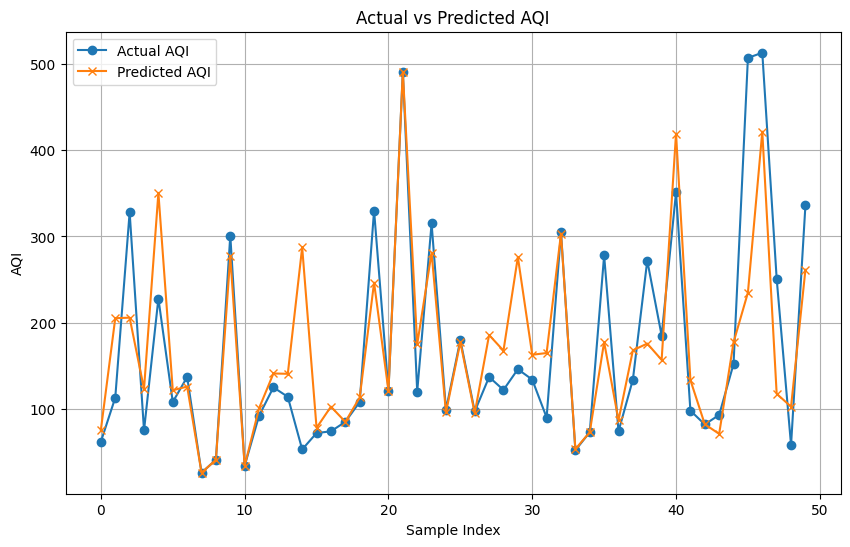

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:50], label='Actual AQI', marker='o')
plt.plot(y_pred[:50], label='Predicted AQI', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('AQI')
plt.title('Actual vs Predicted AQI')
plt.legend()
plt.grid()
plt.show()

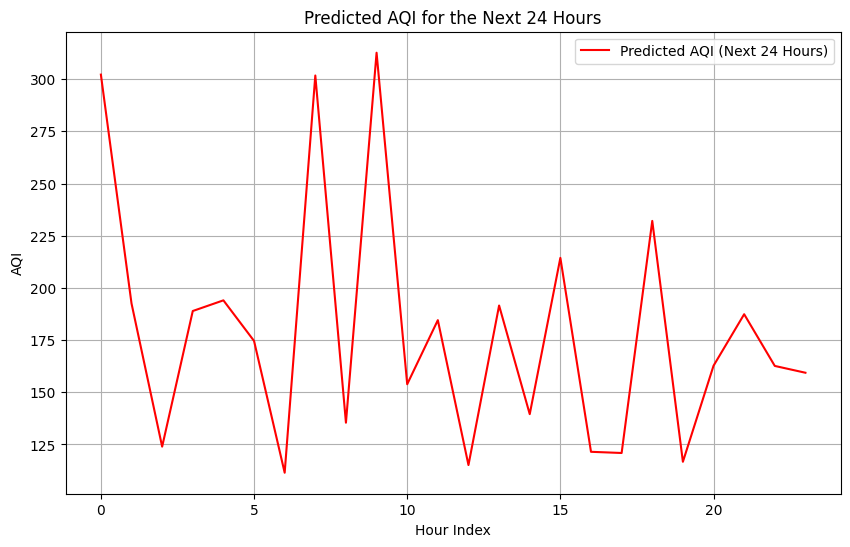

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(future_predictions, label='Predicted AQI (Next 24 Hours)', color='red')
plt.xlabel('Hour Index')
plt.ylabel('AQI')
plt.title('Predicted AQI for the Next 24 Hours')
plt.legend()
plt.grid()
plt.show()